# Project: Investigate Economic and Social Datasets from Gapminder

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, the datasets from [Gapminder World Data](https://www.gapminder.org/data/) is used to analyze the enconomy, health, society and population related situations. In this project, the economic data includes the *GDP growth rate per capita, inflation rate, weekly working hours, people's mean years in school, total health spending, suicide per 100000 people, human development index (HDI), labor force aged 25-54 and sex ratio.* 
All the datasets are downloaded from the website as CSV format.
The Pandas, Numpy are used to process the data and matplotlib is used to visulize the results.

Relationships behind the datasets are tried to dig out. They includes:  
1. The relationship between working hours and human development index (HDI)  
2. The relationship between health expenditure and human development index (HDI)  
3. The relationship between suicide and other indicators in datasets  
4. The relationship between HDI and GDP growth rate  
5. The trends of weekly working hours in selected areas (EU, US, South Korea and Japan)  
6. Which countries have increased HDI but less countribution from the young and middle-aged (aged 25-54)?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# 1961-2016
# inflatin data
df_inflation = pd.read_csv('../datasets/inflation_annual_percent.csv')

# 1980-2007
# weekly working hours
df_work_hour = pd.read_csv('../datasets/working_hours_per_week.csv')

# 1800-2013
# GDP growth per capita
df_gdp_growth_pc = pd.read_csv('../datasets/gdppercapita_growth_percent_per_year.csv')

# 1970-2009
# mean years in school for male
df_mean_yr_scl_m = pd.read_csv('../datasets/mean_years_in_school_men_25_years_and_older.csv')

# 1970-2009
# mean years in school for female
df_mean_yr_scl_f = pd.read_csv('../datasets/mean_years_in_school_women_25_years_and_older.csv')

# 1995-2010
# total health spending per person (international dollar)
df_tt_h_spd_pp = pd.read_csv('../datasets/total_health_spending_per_person_international_dollar.csv')

# 1950-2005
# suicide number of people per 100k people
df_suid_p100k = pd.read_csv('../datasets/suicide_per_100000_people.csv')

# 1990-2015
# human development index
df_hdi = pd.read_csv('../datasets/hdi_human_development_index.csv')

# 1980-2007
# labour force participation rate percent (age:25-54)
df_lbr_frc_25_54 = pd.read_csv('../datasets/aged_25_54_labour_force_participation_rate_percent.csv')

# 1950-2100
# sex ration data (male divide female, per 100)
df_sex_ratio = pd.read_csv('../datasets/sex_ratio_all_age_groups.csv')


### Data Cleaning (Replace this with more specific notes!)

All datasets have the same structure:

|geo  | year1  | year2  | year3  | ...  | year n
| ----| -----  | -----  | -----  | ---- | -----  
|Country| value| value  | value  | ...  | value

There are serveral problems in these datasets after checking:
- The period of data are different with each other.
- The "mean years in shool" data is seperated as male and female. It needs to be merged together and get average value of "mean years".
- The dataset of sex ratio seems based on the 5-year cencus data. So there are empty data between the recorded years. For empty data between the cencus year, can fill the data with arithmetic sequence by assuming they have the same yearly imcresement among 5-year period. For example, the data of 2001 can be calculated by Delta(2005-2000)/5x1+R(2000), the 2002 data can be calculated by Delta(2005-2000)/5x2+R(2000). And the ratio is calculated by male divided by female per 100.
- The data structure of above is a 2D matrix like (country, year1, year2,...). For better understand the relations of these indicators, need to convert the data structure to (country, year, indicator1, indicator2,...).
- In order to make comparations among counties, need to join the data on the country name (column:geo).
- Countries are not same in each dataset, and same countries in these dataset must be extracted and to be used.

First, create each dataframe with the chosen period. The operaions and dataframes are:  

| DataFrames           | Operations |
| ------------------   |----------  |
|df_inflation_95_05    |select columns, remove empty and duplicated data|
|df_work_hour_95_05    |select columns, remove empty and duplicated data|
|df_gdp_gr_pc_95_05    |select columns, remove empty and duplicated data|
|df_mean_yr_scl_m_95_05|select columns, remove empty and duplicated data, merge with df_mean_yr_scl_f_95_05|
|df_mean_yr_scl_f_95_05|select columns, remove empty and duplicated data, merge with df_mean_yr_scl_m_95_05|
|df_tt_spend_pp_95_05  |select columns, remove empty and duplicated data|
|df_suid_p100k_95_05   |select columns, remove empty and duplicated data|
|df_hid_95_05          |select columns, remove empty and duplicated data|
|df_lbr_frc_95_05      |select columns, remove empty and duplicated data|
|df_sex_ratio_95_05    |select columns, remove duplicated data, fill in empty with arithmetic sequence|


#### 1. Extract data to align with the same period (1995-2005)

In [3]:
# define the columns that need to be extract from each dataset
columns = ['geo','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005']

In [4]:
# create dataframe for inflation 
df_inflation_95_05=df_inflation[columns].copy()
# rename the columns by adding prefix 'inf_'
df_inflation_95_05.rename(lambda c:'inf_'+c if c!='geo' else c,axis='columns', inplace=True)
# Remove empty and duplicated data
df_inflation_95_05.dropna(inplace=True)
df_inflation_95_05.drop_duplicates(inplace=True)
df_inflation_95_05.head()

,geo,inf_1995,inf_1996,inf_1997,inf_1998,inf_1999,inf_2000,inf_2001,inf_2002,inf_2003,inf_2004,inf_2005
1,Albania,5.57,41.300,12.10,8.43,1.53,3.98,3.330,2.410,5.380,2.36,2.62
2,Algeria,28.60,24.000,7.00,-3.13,10.90,22.70,-0.482,1.310,8.330,12.20,16.10
3,Andorra,4.93,0.797,2.23,1.50,2.73,29.20,2.770,3.400,2.880,3.35,3.10
4,Angola,1900.00,5400.000,94.30,35.30,557.00,418.00,106.000,197.000,84.900,39.80,26.80
5,Antigua and Barbuda,2.40,2.980,1.83,2.11,1.50,1.55,1.480,0.702,-0.963,1.64,4.46


In [5]:
# create dataframe for working hour
df_work_hour_95_05=df_work_hour[columns].copy()
# rename the columns by adding prefix 'wh_'
df_work_hour_95_05.rename(lambda c:'wh_'+c if c!='geo' else c,axis='columns', inplace=True)
# Remove empty and duplicated data
df_work_hour_95_05.dropna(inplace=True)
df_work_hour_95_05.drop_duplicates(inplace=True)
df_work_hour_95_05.head()

,geo,wh_1995,wh_1996,wh_1997,wh_1998,wh_1999,wh_2000,wh_2001,wh_2002,wh_2003,wh_2004,wh_2005
1,Australia,34.7,34.6,34.5,34.4,34.4,34.3,33.7,33.5,33.4,33.6,33.3
2,Austria,31.7,32.0,32.1,32.0,31.5,31.4,31.4,31.4,31.6,31.7,31.8
4,Belgium,32.2,31.6,31.9,32.1,30.4,29.9,30.3,30.4,30.3,29.8,30.1
6,Canada,33.9,34.1,34.0,34.0,34.0,34.0,33.9,33.5,33.4,33.7,33.4
10,Czech Republic,39.7,39.7,39.8,39.9,40.1,40.2,38.5,38.1,37.9,38.2,38.5


In [6]:
# create dataframe for gdp growth
df_gdp_gr_pc_95_05=df_gdp_growth_pc[columns].copy()
# rename the columns by adding prefix 'gdp_'
df_gdp_gr_pc_95_05.rename(lambda c:'gdp_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_gdp_gr_pc_95_05.dropna(inplace=True)
df_gdp_gr_pc_95_05.drop_duplicates(inplace=True)
df_gdp_gr_pc_95_05.head()

,geo,gdp_1995,gdp_1996,gdp_1997,gdp_1998,gdp_1999,gdp_2000,gdp_2001,gdp_2002,gdp_2003,gdp_2004,gdp_2005
1,Albania,14.00,9.78,-10.300,9.70,14.200,7.3500,8.960,4.540,6.17,6.15,6.26
2,Algeria,1.85,2.31,-0.508,3.54,1.760,2.4300,1.680,4.280,5.85,2.94,4.45
3,Andorra,0.87,3.82,9.120,3.49,3.730,1.9100,1.520,2.350,7.37,3.32,3.83
4,Angola,7.09,8.07,4.990,3.94,0.356,-0.0653,0.893,-10.100,1.60,6.99,14.10
5,Antigua and Barbuda,-6.83,3.77,2.610,1.96,1.200,4.4500,-6.600,-0.392,4.81,4.58,5.22


In [7]:
# create dataframe for mean year in school (male and female)
df_mean_yr_scl_m_95_05=df_mean_yr_scl_m[columns].copy()
df_mean_yr_scl_f_95_05=df_mean_yr_scl_f[columns].copy()

# Remove empty and duplicated data
df_mean_yr_scl_m_95_05.dropna(inplace=True)
df_mean_yr_scl_f_95_05.drop_duplicates(inplace=True)

# combine the male and female "mean years in shool" data by creating a new dataframe
df_mean_yr_scl_95_05 = pd.concat([df_mean_yr_scl_m_95_05, df_mean_yr_scl_f_95_05], ignore_index=True).groupby('geo', as_index=False).mean()
# rename columns by adding prefix 'yr_scl_'
df_mean_yr_scl_95_05.rename(lambda c:'yr_scl_'+c if c!='geo' else c, axis='columns', inplace=True)
df_mean_yr_scl_95_05.head()

,geo,yr_scl_1995,yr_scl_1996,yr_scl_1997,yr_scl_1998,yr_scl_1999,yr_scl_2000,yr_scl_2001,yr_scl_2002,yr_scl_2003,yr_scl_2004,yr_scl_2005
0,Afghanistan,1.00,1.05,1.05,1.10,1.10,1.15,1.20,1.25,1.30,1.30,1.35
1,Albania,7.80,8.00,8.10,8.25,8.40,8.55,8.70,8.85,9.00,9.10,9.30
2,Algeria,2.75,2.85,2.95,3.10,3.20,3.35,3.45,3.55,3.70,3.80,3.95
3,Angola,2.50,2.60,2.70,2.80,2.85,2.95,3.05,3.20,3.30,3.40,3.50
4,Antigua and Barbuda,10.50,10.65,10.75,10.85,11.00,11.10,11.25,11.35,11.45,11.55,11.65


In [8]:
# create dataframe for total health spending
df_tt_spend_pp_95_05=df_tt_h_spd_pp[columns].copy()
# rename columns by adding prefix 'h_spd_'
df_tt_spend_pp_95_05.rename(lambda c:'h_spd_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_tt_spend_pp_95_05.dropna(inplace=True)
df_tt_spend_pp_95_05.drop_duplicates(inplace=True)
df_tt_spend_pp_95_05.head()

,geo,h_spd_1995,h_spd_1996,h_spd_1997,h_spd_1998,h_spd_1999,h_spd_2000,h_spd_2001,h_spd_2002,h_spd_2003,h_spd_2004,h_spd_2005
1,Albania,106.0,146.0,156.0,184.0,225.0,266.0,279.0,303.0,326.0,380.0,407.0
2,Algeria,192.0,180.0,196.0,206.0,203.0,188.0,212.0,225.0,235.0,227.0,222.0
3,Andorra,1470.0,1600.0,1790.0,2320.0,1830.0,1970.0,1950.0,2150.0,2230.0,2330.0,2480.0
4,Angola,68.6,43.0,48.1,41.6,44.3,56.3,82.2,63.4,72.1,63.0,71.3
5,Antigua and Barbuda,502.0,502.0,527.0,544.0,565.0,585.0,580.0,595.0,642.0,689.0,734.0


In [9]:
# creat dataframe for suicide per 100k
df_suid_p100k_95_05 = df_suid_p100k[columns].copy()
# rename columns by adding prefix 'suid_'
df_suid_p100k_95_05.rename(lambda c:'suid_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_suid_p100k_95_05.dropna(inplace=True)
df_suid_p100k_95_05.drop_duplicates(inplace=True)
df_suid_p100k_95_05.head()

,geo,suid_1995,suid_1996,suid_1997,suid_1998,suid_1999,suid_2000,suid_2001,suid_2002,suid_2003,suid_2004,suid_2005
6,Argentina,6.50,6.52,6.41,6.57,6.71,7.58,8.43,8.40,8.57,8.05,7.77
8,Australia,11.30,12.40,13.50,13.30,12.40,11.70,11.80,11.00,10.10,9.66,8.47
9,Austria,18.20,17.70,16.10,15.70,15.40,15.90,14.80,15.20,14.10,13.60,13.10
23,Brazil,4.61,4.59,4.65,4.57,4.16,4.24,4.69,4.57,4.54,4.54,4.78
25,Bulgaria,13.50,14.50,13.70,14.20,12.30,13.10,12.40,12.40,10.40,9.52,9.22


In [10]:
# create dataframe for HDI
df_hdi_95_05 = df_hdi[columns].copy()
# rename columns by adding prefix 'hdi_'
df_hdi_95_05.rename(lambda c:'hdi_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_hdi_95_05.dropna(inplace=True)
df_hdi_95_05.drop_duplicates(inplace=True)
df_hdi_95_05.head()

,geo,hdi_1995,hdi_1996,hdi_1997,hdi_1998,hdi_1999,hdi_2000,hdi_2001,hdi_2002,hdi_2003,hdi_2004,hdi_2005
0,Afghanistan,0.324,0.328,0.332,0.335,0.338,0.340,0.341,0.373,0.381,0.396,0.405
1,Albania,0.628,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696
2,Algeria,0.600,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686
6,Argentina,0.731,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782
7,Armenia,0.603,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692


In [11]:
# create dataframe for labor force
df_lbr_frc_95_05 = df_lbr_frc_25_54[columns].copy()
# rename columns by adding prefix 'lbr_'
df_lbr_frc_95_05.rename(lambda c:'lbr_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_lbr_frc_95_05.dropna(inplace=True)
df_lbr_frc_95_05.drop_duplicates(inplace=True)
df_lbr_frc_95_05.head()

,geo,lbr_1995,lbr_1996,lbr_1997,lbr_1998,lbr_1999,lbr_2000,lbr_2001,lbr_2002,lbr_2003,lbr_2004,lbr_2005
0,Afghanistan,64.6,64.5,64.4,64.3,64.3,64.3,64.3,64.4,64.5,64.6,64.7
1,Albania,75.6,76.2,75.6,76.3,76.9,77.2,77.5,77.6,77.8,78.0,78.1
2,Algeria,63.5,64.1,64.7,65.2,65.8,66.4,66.9,67.4,67.8,68.2,68.6
3,Angola,86.5,86.6,86.6,86.9,87.1,87.0,87.0,87.3,87.2,87.4,87.7
4,Argentina,73.7,74.4,75.1,75.7,76.4,77.1,77.7,78.4,79.0,79.7,80.3


#### 2. Fill the sex ratio data by 5-year mean values

In [12]:
# create dataframe for sex ratio
df_sex_ratio_95_05 = df_sex_ratio[columns].copy()

# calculate the average increment in 1995-2000 and 
# fill the calculated data into the corresponding column
df_sex_ratio_95_05['1996'] = df_sex_ratio_95_05.apply(lambda row:(row['2000']-row['1995'])/5*1+row['1995'], axis=1)
df_sex_ratio_95_05['1997'] = df_sex_ratio_95_05.apply(lambda row:(row['2000']-row['1995'])/5*2+row['1995'], axis=1)
df_sex_ratio_95_05['1998'] = df_sex_ratio_95_05.apply(lambda row:(row['2000']-row['1995'])/5*3+row['1995'], axis=1)
df_sex_ratio_95_05['1999'] = df_sex_ratio_95_05.apply(lambda row:(row['2000']-row['1995'])/5*4+row['1995'], axis=1)

# calculate the average increment in 1995-2000 and 
# fill the calculated data into the corresponding column
df_sex_ratio_95_05['2001'] = df_sex_ratio_95_05.apply(lambda row:(row['2005']-row['2000'])/5*1+row['2000'], axis=1)
df_sex_ratio_95_05['2002'] = df_sex_ratio_95_05.apply(lambda row:(row['2005']-row['2000'])/5*2+row['2000'], axis=1)
df_sex_ratio_95_05['2003'] = df_sex_ratio_95_05.apply(lambda row:(row['2005']-row['2000'])/5*3+row['2000'], axis=1)
df_sex_ratio_95_05['2004'] = df_sex_ratio_95_05.apply(lambda row:(row['2005']-row['2000'])/5*4+row['2000'], axis=1)

# rename columns by adding prefix 'sex_'
df_sex_ratio_95_05.rename(lambda c:'sex_'+c if c!='geo' else c, axis='columns', inplace=True)
# Remove empty and duplicated data
df_sex_ratio_95_05.dropna(inplace=True)
df_sex_ratio_95_05.drop_duplicates(inplace=True)
df_sex_ratio_95_05.head()

,geo,sex_1995,sex_1996,sex_1997,sex_1998,sex_1999,sex_2000,sex_2001,sex_2002,sex_2003,sex_2004,sex_2005
0,Afghanistan,107.0,106.80,106.60,106.40,106.20,106.0,106.2,106.4,106.6,106.8,107.0
1,Albania,96.9,97.92,98.94,99.96,100.98,102.0,101.8,101.6,101.4,101.2,101.0
2,Algeria,103.0,103.00,103.00,103.00,103.00,103.0,102.8,102.6,102.4,102.2,102.0
3,Angola,95.5,95.52,95.54,95.56,95.58,95.6,95.6,95.6,95.6,95.6,95.6
4,Antigua and Barbuda,94.6,93.50,92.40,91.30,90.20,89.1,89.7,90.3,90.9,91.5,92.1


#### 3. Transform the dataframe to integrate all indicators and group by country.

In [13]:
# the new dataframe structure
new_columns = ['geo','gdp_gr_pc','inflation','work_hour','mean_yr_scl',
               'tt_spend_pp','suid_per_100k','hdi','lbr_frc','sex_ratio','year']

**A function is declared to create the formated dataframe based on years**

In [14]:
# define a function to construct new dataframe by input year str
def constructYearlyDF(yr):
    dfs_temp= [df_gdp_gr_pc_95_05[['geo','gdp_'+str(yr)]],    df_inflation_95_05[['geo','inf_'+str(yr)]], 
      df_work_hour_95_05[['geo','wh_'+str(yr)]],      df_mean_yr_scl_95_05[['geo','yr_scl_'+str(yr)]], 
      df_tt_spend_pp_95_05[['geo','h_spd_'+str(yr)]], df_suid_p100k_95_05[['geo','suid_'+str(yr)]],
      df_hdi_95_05[['geo','hdi_'+str(yr)]],           df_lbr_frc_95_05[['geo','lbr_'+str(yr)]], 
      df_sex_ratio_95_05[['geo','sex_'+str(yr)]]]
    # merge all dataframes in that year, join by 'geo'
    df_year = reduce(lambda left,right: pd.merge(left,right,on='geo'), dfs_temp)
    df_year['year']=yr
    # clean
    df_year.dropna(inplace=True)
    df_year.columns=new_columns
    return df_year 

In [15]:
# define a dataframe list in which to hold all processed dataframes
# this list will be used later to create the final dataset 
dfs=[]
years = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005]
for i in range(len(years)):
    df_year = constructYearlyDF(years[i])
    dfs.append(df_year)

In [16]:
# merge all yearly dataframe to a creater the finall dataframe with columns (geo, year, indicator1, indicator2, ...)
df = pd.DataFrame(columns=new_columns)
df = df.append(dfs, ignore_index=True)
df['year'].astype(int)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [17]:
# Get the countries' names which have the most existence frequency
sel_countries = df.geo.mode()
sel_countries
# Just keep the countories with most existence frequency
df = df[df['geo'].isin(sel_countries)]

Text(0,0.5,'Country Number')

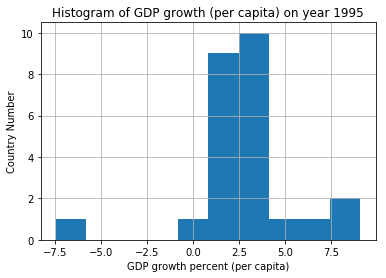

In [18]:
# test
# check the distribution of gdp growth
df.query('year==1995')['gdp_gr_pc'].hist()
plt.title("Histogram of GDP growth (per capita) on year 1995")
plt.xlabel("GDP growth percent (per capita)")
plt.ylabel("Country Number")

<a id='eda'></a>
## Exploratory Data Analysis

#### 1. Does the countries which have higer HDI will have shorter working hours?

- ***Step 1:*** By specifying the year (e.g.2005), get mean HDI and then seperate the weekly working hours to 2 groups: (1) the mean working hour of countries of which have higher HDI; (2) the mean working hour of countries of which have lower HDI. 
- ***Step 2:*** Abstrat a function which can accept the year as parameter, and return the mean working hour lists.
- ***Step 3:*** Apply the step2's common method to each year and get the result list.
- ***Step 4:*** Generate bar chart. The x axis is the year information. On each year, there are 2 mean working hour groups (refer to the groups' description in step1).

> The step1(specify a year) is just for testing, and a common method can be extracted to get each year's data by setting the 'year' as input parameter. So step 1 is not demonstrate here.


In [19]:
# result list to store the mean working hours of which countries have higher hdi (hdi>mean hdi)
mean_wh_arr1=[]
# result list to store the mean working hours of which countries have lower hdi (hdi<mean hdi)
mean_wh_arr2=[]
# loop years to fill the above result lists
for i in range(len(years)):
    # get the year's mean hdi
    mean_hdi = df.query('year=='+str(years[i]))['hdi'].mean()
    # get the mean working hours which hdi is above the mean hdi
    mean_wh_abv_hdi = df.query('hdi>'+str(mean_hdi)+' and year=='+str(years[i]))['work_hour'].mean()
    # get the mean working hours which hdi is below the mean hdi
    mean_wh_blw_hdi = df.query('hdi<='+str(mean_hdi)+' and year=='+str(years[i]))['work_hour'].mean()
    # append yearly results to the result lists 
    mean_wh_arr1.append(mean_wh_abv_hdi)
    mean_wh_arr2.append(mean_wh_blw_hdi)

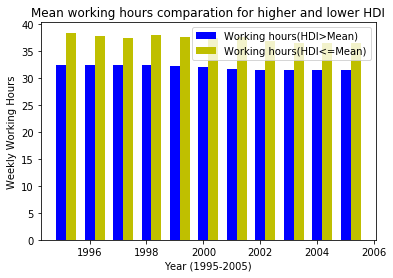

<Figure size 21600x28800 with 0 Axes>

In [20]:
# Create figure to compare the working hours with 2 groups. 
# x-axis:year, y-axis: mean working hours.
fig, ax = plt.subplots()
width=0.35
p1 = ax.bar([int(y) for y in years], mean_wh_arr1, width, color='b')
p2 = ax.bar([float(x)+width for x in years], mean_wh_arr2, width, color='y')
ax.set_title('Mean working hours comparation for higher and lower HDI')
ax.legend((p1[0], p2[0]), ('Working hours(HDI>Mean)', 'Working hours(HDI<=Mean)'))
ax.set_xlabel("Year (1995-2005)")
ax.set_ylabel("Weekly Working Hours")
plt.figure(figsize=(300,400))
plt.show()

This chart shows that people in higher HDI countries have less weekly working hours than that in the lower HDI countries. This sitution is same from 1995 to 2005.

#### 2. Does the countries have higher HDI will have higher health spending per person?
> The steps are similar with the question 1, while here the **'total health spending per person'** is used instead of working hours. 

In [21]:
# the methods for finding the relationship are similar with methods in the questing 1.
# the column 'tt_spend_pp' is used
mean_hs_arr1=[]
mean_hs_arr2=[]
for i in range(len(years)):
    mean_hdi = df.query('year=='+str(years[i]))['hdi'].mean()
    mean_hs_abv_hdi = df.query('hdi>'+str(mean_hdi)+' and year=='+str(years[i]))['tt_spend_pp'].mean()
    mean_hs_blw_hdi = df.query('hdi<='+str(mean_hdi)+' and year=='+str(years[i]))['tt_spend_pp'].mean()
    mean_hs_arr1.append(mean_hs_abv_hdi)
    mean_hs_arr2.append(mean_hs_blw_hdi)

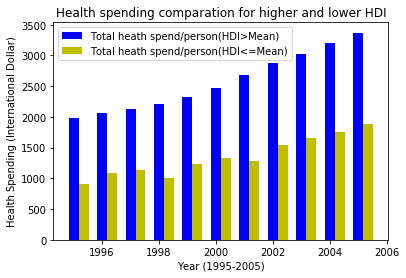

<Figure size 21600x28800 with 0 Axes>

In [22]:
# Create figure to compare the health spending by years with groups
# x-axis: year, y-axis: mean total health spending (per person).
fig, ax = plt.subplots()
width=0.35
p1 = ax.bar([y for y in years], mean_hs_arr1, width, color='b')
p2 = ax.bar([x+width for x in years], mean_hs_arr2, width, color='y')

ax.set_title('Health spending comparation for higher and lower HDI')
ax.legend((p1[0], p2[0]), ('Total heath spend/person(HDI>Mean)', 'Total heath spend/person(HDI<=Mean)'))
ax.set_xlabel("Year (1995-2005)")
ax.set_ylabel("Health Spending (International Dollar)")
plt.figure(figsize=(300,400))
plt.show()

This chart show people have more expenditure on health in the higher HDI contries than that in lower HDI countries.  
Also, from above chart, we can see there is a clear trend that the yearly health spending is incresed yearly for higer HDI countries.
And for countries with lower HDI, there are some fluctuations but the trend is clear between 2001-2005.

#### 3. The suicid has any relationships with other indicators?
- ***Step 1:*** Create scatter charts for each indicator with the suicide data.
- ***Step 2:*** Detail analysis with correlation for the indicator(if exist) and suicide data.
> In this experiment, there sames no clear relationship between suicide and each other single indictors. So, no further analysis perform for step2.

Scatter chart is useful to find relationships between 2 variables. Below, scatters of diffrenet indicators along with suicide are generated to check any pattern existence roughly:

Text(0,0.5,'Suicide number (per 100000 people)')

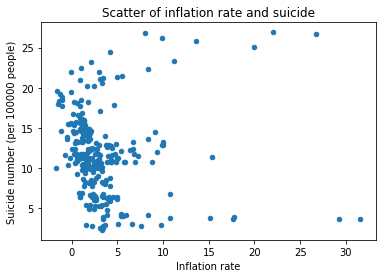

In [23]:
# scatter between infaltion and suicide
df.plot.scatter(x='inflation', y='suid_per_100k')
plt.title("Scatter of inflation rate and suicide")
plt.xlabel("Inflation rate")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

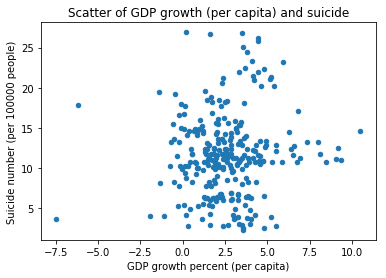

In [24]:
# scatter between GDP growth rate and suicide
df.plot.scatter(x='gdp_gr_pc', y='suid_per_100k')
plt.title("Scatter of GDP growth (per capita) and suicide")
plt.xlabel("GDP growth percent (per capita)")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

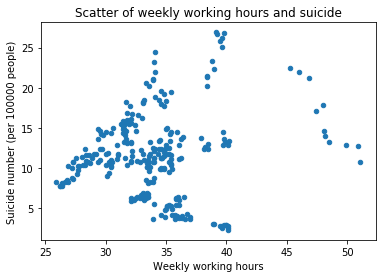

In [25]:
# scatter between working hours and suicide
df.plot.scatter(x='work_hour', y='suid_per_100k')
plt.title("Scatter of weekly working hours and suicide")
plt.xlabel("Weekly working hours")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

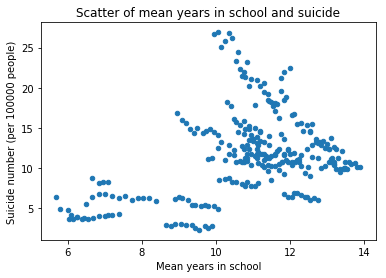

In [26]:
# scatter between mean years in school and suicide
df.plot.scatter(x='mean_yr_scl', y='suid_per_100k')
plt.title("Scatter of mean years in school and suicide")
plt.xlabel("Mean years in school")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

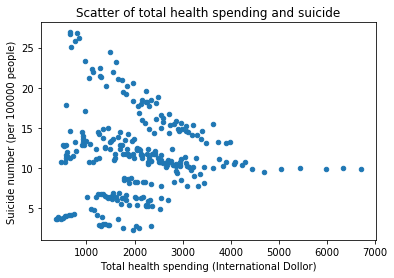

In [27]:
# scatter between total health spending per person and suicide
df.plot.scatter(x='tt_spend_pp', y='suid_per_100k')
plt.title("Scatter of total health spending and suicide")
plt.xlabel("Total health spending (International Dollor)")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

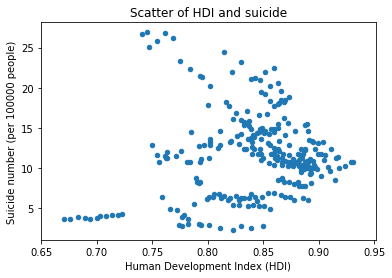

In [28]:
# scatter between HDI and suicide
df.plot.scatter(x='hdi', y='suid_per_100k')
plt.title("Scatter of HDI and suicide")
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

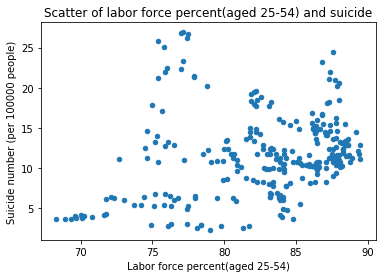

In [29]:
# scatter between labor force (aged 25-54) and suicide
df.plot.scatter(x='lbr_frc', y='suid_per_100k')
plt.title("Scatter of labor force percent(aged 25-54) and suicide")
plt.xlabel("Labor force percent(aged 25-54)")
plt.ylabel("Suicide number (per 100000 people)")

Text(0,0.5,'Suicide number (per 100000 people)')

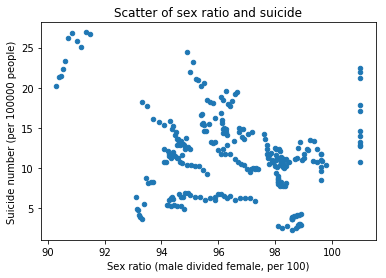

In [30]:
# scatter between sex ratio and suicide
df.plot.scatter(x='sex_ratio', y='suid_per_100k')
plt.title("Scatter of sex ratio and suicide")
plt.xlabel("Sex ratio (male divided female, per 100)")
plt.ylabel("Suicide number (per 100000 people)")

From above scatters, there is no indicator can be found with a strong relationship with suicide number.

#### 4. Will the high HDI countries have the lowest GDP growth rate? Will the low HDI countries have the highest GDP growth rate?
- ***Step 1:*** Choose the year 2005, classify HDI to different levels by min, 25%, 50%, 75% and max values. 
- ***Step 2:*** Select the GDP data and group by the HDI level. 
- ***Step 3:*** Visualize groups of data. 

In [31]:
# Get the min, 25%, 50%, 75% and max values of HDI
df.query('year==2005')['hdi'].describe()

count    25.000000
mean      0.865040
std       0.046409
min       0.723000
25%       0.850000
50%       0.873000
75%       0.893000
max       0.931000
Name: hdi, dtype: float64

In [32]:
# define the egde and labels
hdi_edge=[0.723000, 0.850000, 0.873000, 0.893000, 0.931000]
hdi_labels=['low','medium low','medium high','high']
df_hdi_lvl_05=df.query('year==2005').copy()
# cut dataframe with edge
df_hdi_lvl_05['hdi_lvl'] = pd.cut(df_hdi_lvl_05['hdi'], hdi_edge, labels=hdi_labels)
df_hdi_lvl_05.head()

,geo,gdp_gr_pc,inflation,work_hour,mean_yr_scl,tt_spend_pp,suid_per_100k,hdi,lbr_frc,sex_ratio,year,hdi_lvl
250,Australia,1.85,3.7100,33.3,11.50,2960.0,8.47,0.915,82.0,99.6,2005,high
251,Austria,1.45,2.6400,31.8,11.10,3480.0,13.10,0.854,86.5,94.6,2005,medium low
252,Canada,2.19,3.1500,33.4,13.90,3450.0,10.10,0.891,86.3,98.3,2005,medium high
253,Czech Republic,6.39,0.0737,38.5,13.25,1480.0,12.40,0.847,88.3,95.0,2005,low
254,Denmark,2.06,2.9100,30.1,12.55,3240.0,8.97,0.902,87.6,98.1,2005,high


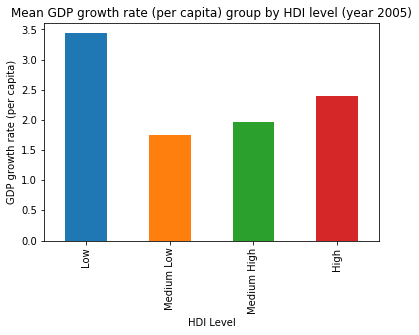

In [33]:
# create bar chart
x_label=['Low','Medium Low','Medium High', 'High']
hdi_lvl_gdp = df_hdi_lvl_05.groupby('hdi_lvl')['gdp_gr_pc'].mean().plot(kind='bar')
plt.title('Mean GDP growth rate (per capita) group by HDI level (year 2005)')
plt.xlabel('HDI Level')
plt.ylabel('GDP growth rate (per capita)')
plt.xticks([0,1,2,3], x_label)
plt.show()

The chart shows that in 2005, countries in low HDI group have the highest mean GDP growth (per capita). But the countries in high HDI group have a second high mean GDP growth. The countries with medium low HDI have lowest mean GDP growth.

#### 5. The trends of weekly working hours (group by EU, USA, South Korea and Japan)
- ***Step 1: Find counties that belong to Europen Union***
- ***Step 2: Create dataframe for each region with working hours for period (1995-2005)***
- ***Step 2: Create line chart to check the trends***

In [34]:
# Define countries list which are the EU member
eu=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 
    'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']
# dataframe to contain EU's data
df_yr_wh_eu = pd.DataFrame(columns=['geo','mean_wh','year'])
# dataframe to contain US's data
df_yr_wh_us = pd.DataFrame(columns=['geo','mean_wh','year'])
# dataframe to contain South Korea's data
df_yr_wh_sk = pd.DataFrame(columns=['geo','mean_wh','year'])
# dataframe to contain Japan's data
df_yr_wh_jp = pd.DataFrame(columns=['geo','mean_wh','year'])
# loop years to fill the data into the dataframes
for i in range(len(years)):
    df_yr = df.query('year=='+str(years[i]))
    # find the mean working hour in that year
    mean_wh_eu = df_yr[df_yr['geo'].isin(eu)]['work_hour'].mean()
    mean_wh_us = df_yr[df_yr['geo']=='United States']['work_hour'].mean()
    mean_wh_sk = df_yr[df_yr['geo']=='South Korea']['work_hour'].mean()
    mean_wh_jp = df_yr[df_yr['geo']=='Japan']['work_hour'].mean()
    # fill in data
    df_yr_wh_eu.loc[i]=['EU',mean_wh_eu,years[i]]
    df_yr_wh_us.loc[i]=['USA',mean_wh_us,years[i]]
    df_yr_wh_sk.loc[i]=['SK',mean_wh_sk,years[i]]
    df_yr_wh_jp.loc[i]=['JPN',mean_wh_jp,years[i]]

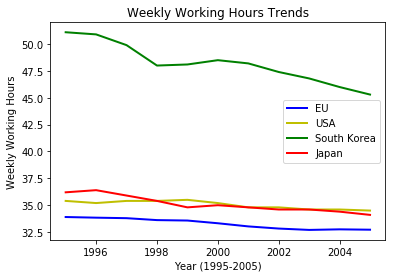

In [35]:
# create line chart for the trends
plt.plot(years, df_yr_wh_eu['mean_wh'].values, color='b', linewidth=2)
plt.plot(years, df_yr_wh_us['mean_wh'].values, color='y', linewidth=2)
plt.plot(years, df_yr_wh_sk['mean_wh'].values,  color='g', linewidth=2)
plt.plot(years, df_yr_wh_jp['mean_wh'].values,  color='r', linewidth=2)
plt.title("Weekly Working Hours Trends")
plt.xlabel("Year (1995-2005)")
plt.ylabel("Weekly Working Hours")
plt.legend(['EU','USA','South Korea','Japan'])
plt.show()

This shows the trends that for the above areas, the weekly working hours are decreased. But some of areas have fluctuations instead of straight drop down.

#### 6. Which countries have increased HDI but less countribution from the young and middle-aged?
> Here, finding the countries that the society is developed with less contribution from the people whose age is in 25-54. The definition of "Society developed" here means HDI increased with the comparision of data in 1995 and 2005. The labor force data is the ratio of labor force that aged 25-54 to total labor force.

- ***Step 1: Extract data from 1995 and rename the columns***
- ***Step 2: Extract data from 2005 and rename the columns***
- ***Step 3: Do query to find countries of which HDI(2005)>HDI(1995) and Labor(2005)<Labor(1995)***

In [36]:
# create the dataframe and fill in 1995's data with query
df_hdi_lbr=df.query('year==1995')[['geo','hdi','lbr_frc']]
# rename columns
df_hdi_lbr.rename(columns={'hdi':'hdi_95','lbr_frc':'lbr_frc_95'}, inplace=True)
df_hdi_lbr.head()

,geo,hdi_95,lbr_frc_95
0,Australia,0.885,80.6
1,Austria,0.816,83.3
2,Canada,0.860,83.3
3,Czech Republic,0.785,89.2
4,Denmark,0.830,87.1


In [37]:
# create the dataframe for 2005 and fill in by query
df_temp_05 = df.query('year==2005')[['geo','hdi','lbr_frc']]
# merge in the 2005's data
df_hdi_lbr = df_hdi_lbr.merge(df_temp_05,on='geo', how='inner')
# rename columns
df_hdi_lbr.rename(columns={'hdi':'hdi_05','lbr_frc':'lbr_frc_05'}, inplace=True)
df_hdi_lbr.head()

,geo,hdi_95,lbr_frc_95,hdi_05,lbr_frc_05
0,Australia,0.885,80.6,0.915,82.0
1,Austria,0.816,83.3,0.854,86.5
2,Canada,0.860,83.3,0.891,86.3
3,Czech Republic,0.785,89.2,0.847,88.3
4,Denmark,0.830,87.1,0.902,87.6


In [38]:
# query the data from the new dataframe to find result
df_res = df_hdi_lbr.query('hdi_05>hdi_95 and lbr_frc_05<lbr_frc_95')
df_res

,geo,hdi_95,lbr_frc_95,hdi_05,lbr_frc_05
3,Czech Republic,0.785,89.2,0.847,88.3
18,Slovak Republic,0.750,88.4,0.793,87.9
24,United States,0.877,83.6,0.898,82.9


The countries of Czech Republic, Slovak Republic and United States are found here which they suffered the decreasing on the young and middle-aged labor force (aged 25-54) during the society development from 1995 to 2005.

<a id='conclusions'></a>
## Conclusions

#### 1. Does the countries which have higer HDI will have shorter working hours?
Yes, from the chart generated, the countries which have higher HDI(Human Development Index) also have shorter working hours.
The Human Development Index (HDI) is a statistic (composite index) of life expectancy, education, and per capita income indicators, which are used to rank countries into four tiers of human development[[1]((https://en.wikipedia.org/wiki/Human_Development_Index))].The countries that have higer level HDI are developed countries like western Euro and north America (US, Canada). In the developed countries, people have good balance on working and persional life, so the conclusion is reasonable.

##### Limitation
The countries included in this project are mainly from EU, US, Canada, Austrilia, South Korea and Japan. Most of the countires are developed countries. The data from developing countries in Asia, Africa, South America are missing. Maybe that countries are removed because of empty data during the period. So here cannot get a common conclusion which can apply to other areas.  

#### 2. Does the countries have higher HDI will have higher health spending per person?
Yes. As state in the above question, the higher level HDI countries are developed countries. Healthy condition is one of the consideration in the HDI. Developed countries have better medical conditions and people have a higher recognition on their life and health. 
##### Limitation
Similar with the limitations in question 1, this project missed data from developing countries.

#### 3. The suicid has any relationships with other indicators?
For the other indicators used in this project, there is no relationship can be found as the data distribution is quite messy. The suicide belong to the mental health area and may need more related information to get conclusion. 

#### 4. Will the high HDI countries have the lowest GDP growth rate? Will the low HDI countries have the highest GDP growth rate?
For the cases in this report (in year 2005), the countires with lower level HDI (between 0.723 and 0.85) have a higher GDP growth rate (per capita). But the countries with higest level HDI don't have the lowest GDP growth rate (per capita). From the chart, the HDI between 0.85 and 0.873 have the lowest GDP growth rate.

##### Limitation
Also, the data used here is not adequate. The HDI range is not large enough. The mean HDI here used is beyond 0.86 and this is quite high. From news we know, in that period, developing countries like China, India, Brazil and so on have steep GDP growth rate. These countries are devloping countries with maybe not too much lower HDI but have highest GDP growth rate. How about the GDP growth rate in the least developed countries? That needs futher exploration.

#### 5. The trends of weekly working hours (group by EU, USA, South Korea and Japan)
For the given period of 1995-2005, it clearly shows that the weekly working hours in above areas are all decreased.

##### Limitation
For the developed countries, the trends is clearly that the weekly working hours are droped. And maybe the IT helped people working more efficient. But how about the the least developed countries and the countries with high GDP growth rate? As we know India and China input more resources on IT, does more and more people work over time? Result could be more convincing if more countries are added.  
Add also, news also states that Japan has high working hours[[6](https://www.cnbc.com/2018/06/01/japan-has-some-of-the-longest-working-hours-in-the-world-its-trying-to-change.html)]. But data here shows that Japan has a close working hours with US after 2000. This data make me doubt.

#### 6. Which countries have increased HDI but less countribution from the young and middle-aged?
By comparing the data in 1995 and 2005, Czech Republic, Slovak Republic and United States show that the labor force aged in 25-54 decreased while the HDI increased. That means this ages group make less contribution on the society development. Integrate with the unemployment data:

|Country|Unemployment Rate(1995)|Unemployment Rate(2005)|Reference|
|-------|----|----|---|
|US|5.6%|5.1%|[[2](https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/)]
|Czech|3.74%|7.85%|[[3](http://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=132.STS.Q.CZ.S.UNEH.RTT000.4.000)]
|Slovak|12.1|16.4|[[4]((http://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.SVK.1.0.0.0.ZUTN&))]

Except the US unemployment rate went down, the Czech and Slovak suffered a higher unemployment rate. This can explain the results for Czech and Slovak.
But what happened for US young and middle-aged labor force during this period? By searching this topic, this [artical](https://stats.bls.gov/opub/mlr/2016/article/labor-force-participation-what-has-happened-since-the-peak.htm) give the answer. ***"From 2000 to 2015, the decline in participation occurred across most of the major demographic groups. Teenagers experienced the steepest drop in participation, which coincided with a rise in their school enrollment rate."***[[5](https://stats.bls.gov/opub/mlr/2016/article/labor-force-participation-what-has-happened-since-the-peak.htm)]

##### Limitation
The year range maybe too extensive and details are lost. For instance, the young labor force increased during the first period but drop down in second period.

# Reference
1. https://en.wikipedia.org/wiki/Human_Development_Index  
2. https://www.statista.com/statistics/193290/unemployment-rate-in-the-usa-since-1990/  
3. http://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=132.STS.Q.CZ.S.UNEH.RTT000.4.000  
4. http://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.SVK.1.0.0.0.ZUTN&  
5. https://stats.bls.gov/opub/mlr/2016/article/labor-force-participation-what-has-happened-since-the-peak.htm  
6. https://www.cnbc.com/2018/06/01/japan-has-some-of-the-longest-working-hours-in-the-world-its-trying-to-change.html  